### ДЗ Марковские процессы

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [67]:
import warnings
warnings.filterwarnings("ignore") 

In [68]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [14]:
with open('data/WarPeace/tom_1.txt', 'r', encoding="utf-8") as f:
    text1 = f.read().lower()
with open('data/WarPeace/tom_2.txt', 'r', encoding="utf-8") as f:
    text2 = f.read().lower()    
with open('data/WarPeace/tom_3.txt', 'r', encoding="utf-8") as f:
    text3 = f.read().lower()    
with open('data/WarPeace/tom_4.txt', 'r', encoding="utf-8") as f:
    text4 = f.read().lower()    
text_all = re.sub('[^a-zа-я^ ]','', text1) + re.sub('[^a-zа-я^ ]','', text2) + re.sub('[^a-zа-я^ ]','', text3) + re.sub('[^a-zа-я^ ]','', text4)
text = re.sub('[^а-я^ ]','', text1) + re.sub('[^а-я^ ]','', text2) + re.sub('[^а-я^ ]','', text3) + re.sub('[^а-я^ ]','', text4)

In [85]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
RUSSIAN_wo_space = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}   
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN))) 
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])   
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

Матрица переходных вероятностей для книги Война и мир:

In [75]:
df[1:5]

,а,б,в,г,д,е,ж,з,и,й,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.141918,0.000475,0.000050,0.048690,0.000000,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007836,0.111638,0.000028,0.012524,0.078979,0.000000,...,0.001015,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.030714,0.000066,0.000088,0.043013,0.000000,...,0.001634,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.170894,0.000539,0.000099,0.095730,0.000014,...,0.001248,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844


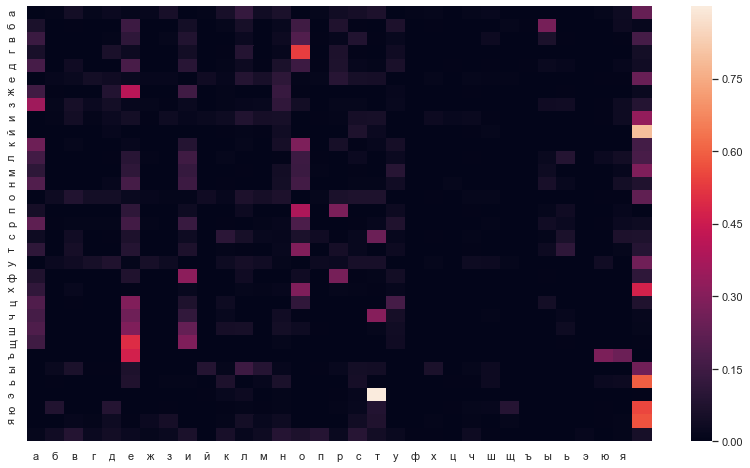

In [76]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

#### вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р:

In [78]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_df = pd.DataFrame(columns=['word', 'proba'])
cnt = 0
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] *  probabilities[ POS[c2], POS[c1]] * probabilities[POS[c2], end]
        if proba > 0:
            cnt = cnt+1
            # print(''.join(['п', c1, c2, 'р']), proba)
            proba_df.loc[cnt] = [''.join(['п', c1, c2, 'р']), proba]

Марковская цепь неоднородна, поэтому получили много вариантов:

In [79]:
print(len(proba_df))
proba_df.head(4)

688


,word,proba
1,паар,1.286129e-08
2,пабр,7.804059e-06
3,павр,3.525075e-06
4,пагр,6.195128e-06


максимальная вероятность для строки:

In [80]:
print(proba_df[['word', 'proba']][proba_df.proba == proba_df.proba.max()])

     word     proba
283  попр  0.001244


#### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [90]:
s = []
start = 'б'
s.append(start)
length = 7
i = 0
while i < length:
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index]) 
    if next_char != ' ': 
        s.append(next_char)
        i += 1

print (''.join(s))

бегожета


# Прогноз с использованием HMM

 Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [61]:
from hmmlearn.hmm import GaussianHMM
series = pd.read_csv("data/TimeSeries/weekly-closings-of-the-dowjones-.csv")["Close"]
values = series.values.reshape(-1,1)

In [216]:
for n in range(1, 13):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=10000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6341453620579
3 -786.8375332667708
4 -752.0201472668986
5 -737.1181111930928
6 -729.5671112589469
7 -713.7233991716988
8 -702.1057754508204
9 -690.9844591636469
10 -691.2687307206903


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -682.253909045022
12 -675.2607639286775


In [221]:
model = GaussianHMM(n_components=12,
                        covariance_type="diag",
                        n_iter=10000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]  
   
#plt.figure(figsize=(12, 6))
#plt.plot(values)
#plt.plot(means, linewidth=3)

Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


In [222]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [223]:
ss = pd.DataFrame(means)
series_pred = predict(series, 7, 50)
means_predict = predict(ss, 7, 50)

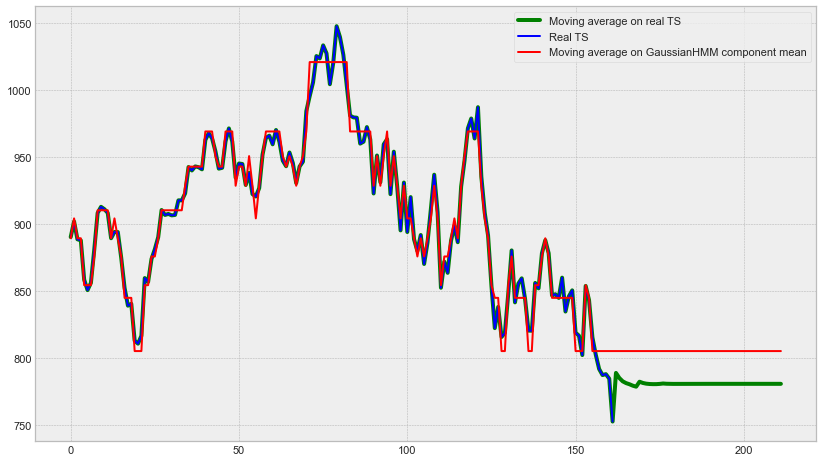

In [224]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Moving average on real TS')
    plt.plot(series, color='blue', linewidth='2', label='Real TS')
    plt.plot(means_predict, color='red', linewidth='2', label='Moving average on GaussianHMM component mean')
    plt.legend()